<a href="https://colab.research.google.com/github/Jannath19/datasci_6_regression/blob/main/HHA507_datasci_6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Packages

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
from statsmodels.stats.diagnostic import het_goldfeldquandt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Loading In Dataset


In [3]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


# Variables


# Independent_variable = Age
# Dependent_variable = SystolicBP

In [5]:
# extracting data for regression
X = sm.add_constant(df['Age'])  # Adds a constant term to the predictor

# fit the regression model
model = sm.OLS(df['SystolicBP'], X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     211.8
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.03e-43
Time:                        03:36:52   Log-Likelihood:                -4295.3
No. Observations:                1014   AIC:                             8595.
Df Residuals:                    1012   BIC:                             8604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.2235      1.279     75.214      0.0

## **Assumption/Evaluation**
The regression model indicates an R-squared value of 0.173. This implies that approximately 17.3% of the variation in SystolicBP (dependent variable) can be explained by Age (independent variable). The relatively low R-squared value suggests that Age alone may not be a strong predictor of SystolicBP, indicating a weak relationship between the two variables.


In [6]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9422994456508089, p-value=0.7479772058452188


### Assessing Linearity of the Relationship
The Rainbow Test for linearity yields a test statistic of 0.9423 and a p-value of 0.748. Since the p-value is greater than the conventional significance level of 0.05, we fail to reject the null hypothesis. There is no strong evidence to suggest that the relationship between Age and SystolicBP is nonlinear.


In [7]:
residuals = results.resid
fitted = results.fittedvalues

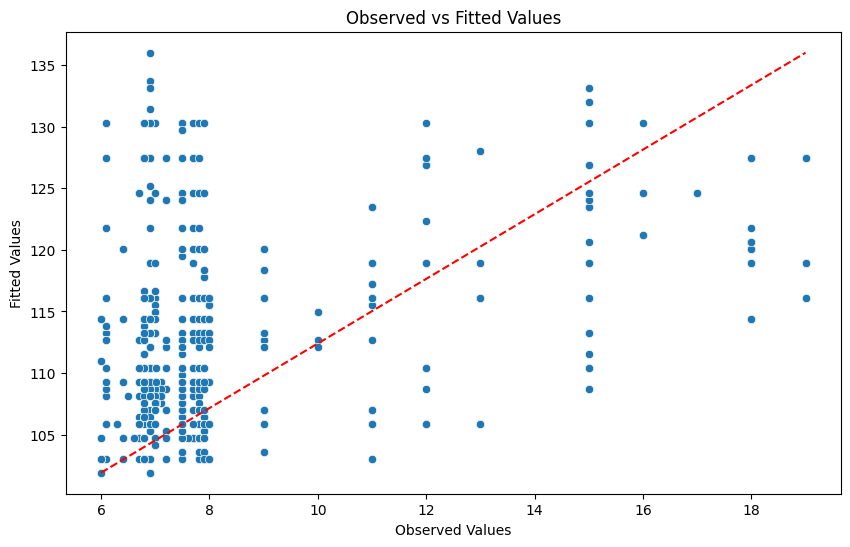

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['BS'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['BS']), max(df['BS'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

Shapiro-Wilk Test: W=0.9792269468307495, p-value=7.463880208335993e-11


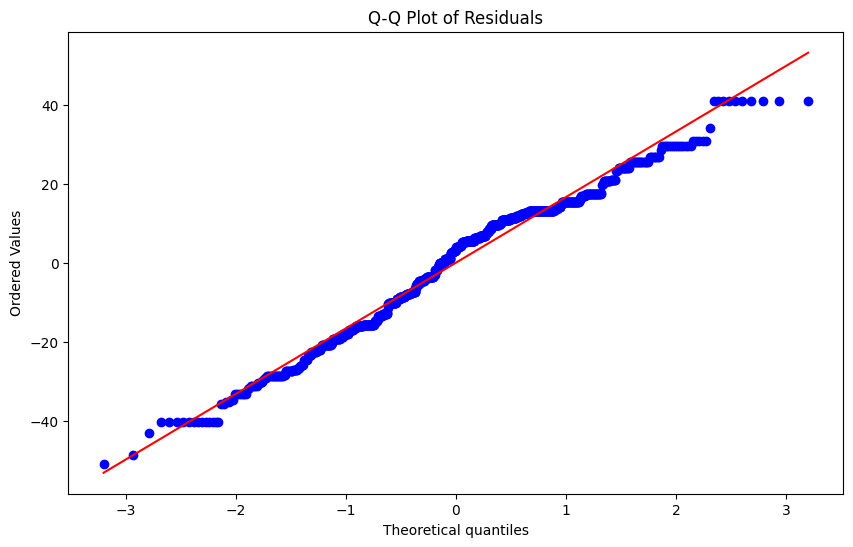

In [11]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Shapiro-Wilk Test for Normality
The Shapiro-Wilk test on the residuals of the regression model yields a W-statistic of 0.9792 and an extremely low p-value of 7.46e-11. Since the p-value is well below the conventional significance level of 0.05, we reject the null hypothesis. This suggests that the residuals are not normally distributed.



In [12]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.8710478263699932, p-value=0.9394119363989578


### Goldfeld-Quandt Test for Heteroscedasticity
The Goldfeld-Quandt test yields an F-statistic of 0.8710 with a p-value of 0.9394. Since the p-value is greater than the conventional significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no strong evidence of heteroscedasticity in the residuals.



## **The Reasoning Behind My Dataset and Variable Choices**

I selected the "Maternal Health Risk" dataset due to its relevance to maternal health outcomes during pregnancy. The dataset offers a deeper understanding of factors associated with maternal well-being, making it a valuable resource for investigating potential correlations and risks.

### **Variable Selection:**
- **Dependent Variable (Response):**
  - I chose Systolic Blood Pressure as the dependent variable. This choice aligns with the significance of monitoring cardiovascular health during pregnancy.

- **Independent Variables (Predictors):**
  - The inclusion of multiple numerical variables in the dataset provided a rich set of health indicators to analyze.

- **Choice of Age as Independent Variable:**
  - Age was chosen as the independent variable without a specific predetermined reason. The decision was driven by the exploration of potential relationships between maternal age and systolic blood pressure. This open-ended approach allows for uncovering any unforeseen correlations and contributing to a comprehensive understanding of maternal health risk factors.

### **Exploratory Goal:**
The goal of this analysis is to explore the complex relationship between maternal age and various physiological measures, such as diastolic blood pressure, blood sugar levels, body temperature, and heart rate. By examining these relationships, the aim is to contribute valuable insights into potential risk factors impacting maternal health during pregnancy.


##**Multiple Linear Regression**

### Variables:

**Independent Variables:**
- Age
- Diastolic Blood Pressure
- Blood Sugar
- Body Temperature
- Heart Rate

**Dependent Variable:**
- Systolic Blood Pressure


In [13]:
X = df[['BodyTemp', 'Age', 'BS', 'DiastolicBP', 'HeartRate']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['SystolicBP']

model_1 = sm.OLS(y, X)

results_1 = model_1.fit()

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          1.21e-221
Time:                        03:59:58   Log-Likelihood:                -3871.5
No. Observations:                1014   AIC:                             7755.
Df Residuals:                    1008   BIC:                             7785.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         137.8030     26.898      5.123      

## **Assumption**
The multiple regression model exhibits an R-squared value of 0.642, indicating a moderate level of explanation (64.2%) of the variability in Systolic Blood Pressure by the chosen independent variables. However, the potential non-normality of residuals and slight positive autocorrelation should be noted. The model demonstrates a reasonably good fit, but further investigation and consideration of alternative diagnostic measures may enhance its reliability.


In [14]:
residuals = results.resid
fitted = results.fittedvalues

In [15]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
      Variable          VIF
0        const  6012.699203
1     BodyTemp     1.121632
2          Age     1.428679
3           BS     1.446578
4  DiastolicBP     1.362384
5    HeartRate     1.048250


## **VIF Insights**
The VIF data reveals that multicollinearity is not a significant concern in the multiple regression model. All variables, including BodyTemp, Age, BS, DiastolicBP, and HeartRate, exhibit VIF values well below the commonly accepted threshold of 10. The highest VIF, found for the constant term, is likely due to the nature of the intercept.


In [16]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9422994456508089, p-value=0.7479772058452188


## **Linearity Assessment with Rainbow Test**
The Rainbow Test, with a p-value of 0.748, suggests that our multiple regression model effectively captures the linear relationship between the independent variables and the dependent variable. There is no strong evidence to indicate a departure from linearity, supporting the validity of our model in representing linear associations.



Shapiro-Wilk Test: W=0.9792269468307495, p-value=7.463880208335993e-11


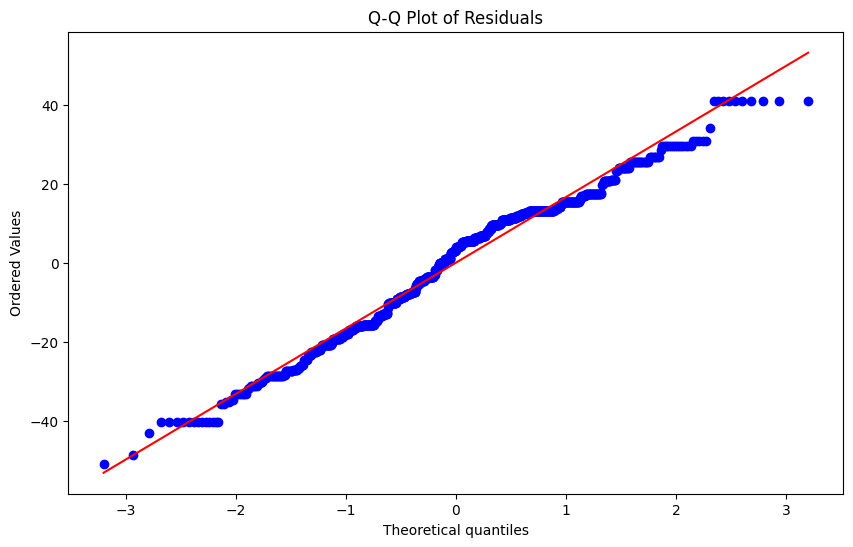

In [17]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

## **Shapiro-Wilk Test for Normality**
The Shapiro-Wilk Test on residuals yields a W-statistic of 0.9792 and an extremely low p-value of 7.46e-11. The small p-value indicates a departure from normality in the residuals. While the normality assumption may be violated, it's essential to consider the robustness of regression models to this violation, especially with larger sample sizes.


In [20]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.8710478263699932, p-value=0.9394119363989578


## **Goldfeld-Quandt Test**
The Goldfeld-Quandt Test returns an F-statistic of 0.8710 with a p-value of 0.9394. Given the p-value exceeding the common significance level of 0.05, there is no strong evidence to reject the null hypothesis of homoscedasticity. This suggests that the variance of residuals remains relatively consistent across different levels of the independent variables, supporting the assumption of homoscedasticity in the regression model.
